# Parameters BEGINNER

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones. 

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'parameters__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('parameters')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-04 19:49:02.587138 Data cache files found ...
2024-07-04 19:49:02.623751 Data cache files successfully loaded!!
The dataset contains 61752 (40.13%) instances for BEGINNER class and 92146 (59.87%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'parameters'
TABLE_FEATURES = ['parameters__parameters_role', 'parameters__number_of_params', 'parameters__pos_only_param_pct', 'parameters__var_param_pct', 'parameters__has_var_param', 'parameters__type_annotation_pct', 'parameters__kw_only_param_pct', 'parameters__default_value_pct', 'parameters__has_kw_param', 'parameters__name_convention']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (61752, 10)
As we can see the downloaded data contains a total of 61752 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61752 entries, 0 to 61751
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   parameters__parameters_role      61752 non-null  object 
 1   parameters__number_of_params     61752 non-null  int64  
 2   parameters__pos_only_param_pct   61752 non-null  float64
 3   parameters__var_param_pct        61752 non-null  float64
 4   parameters__has_var_param        61752 non-null  bool   
 5   parameters__type_annotation_pct  61752 non-null  float64
 6   parameters__kw_only_param_pct    61752 non-null  float64
 7   parameters__default_value_pct    61752 non-null  float64
 8   parameters__has_kw_param         61752 non-null  bool   
 9   parameters__name_convention      56178 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 4.4+ MB
None


Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 2 variables boleanas y tres de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

parameters__parameters_role           0
parameters__number_of_params          0
parameters__pos_only_param_pct        0
parameters__var_param_pct             0
parameters__has_var_param             0
parameters__type_annotation_pct       0
parameters__kw_only_param_pct         0
parameters__default_value_pct         0
parameters__has_kw_param              0
parameters__name_convention        5574
dtype: int64

In [5]:
print_empty_cols(X)

parameters__parameters_role
---------------------------
0 instancias no tienen un valor para la columna parameters__parameters_role


parameters__number_of_params
----------------------------
0 instancias no tienen un valor para la columna parameters__number_of_params


parameters__pos_only_param_pct
------------------------------
0 instancias no tienen un valor para la columna parameters__pos_only_param_pct


parameters__var_param_pct
-------------------------
0 instancias no tienen un valor para la columna parameters__var_param_pct


parameters__has_var_param
-------------------------
0 instancias no tienen un valor para la columna parameters__has_var_param


parameters__type_annotation_pct
-------------------------------
0 instancias no tienen un valor para la columna parameters__type_annotation_pct


parameters__kw_only_param_pct
-----------------------------
0 instancias no tienen un valor para la columna parameters__kw_only_param_pct


parameters__default_value_pct
--------------

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parameters__parameters_role,61752,2,FunctionParams,59879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__number_of_params,61752.0,NaN,NaN,NaN,1.848717,1.490007,0.0,1.0,2.0,2.0,21.0
parameters__pos_only_param_pct,61752.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parameters__var_param_pct,61752.0,NaN,NaN,NaN,0.010148,0.076837,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,61752,2,False,60403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__type_annotation_pct,61752.0,NaN,NaN,NaN,0.090694,0.260266,0.0,0.0,0.0,0.0,1.0
parameters__kw_only_param_pct,61752.0,NaN,NaN,NaN,0.001517,0.03232,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,61752.0,NaN,NaN,NaN,0.070554,0.194688,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,61752,2,False,60141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__name_convention,56178,7,Lower,49119,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "parameters__number_of_params": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 0 ; max: 58
    "parameters__pos_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__var_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "parameters__type_annotation_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__kw_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__default_value_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['parameters__number_of_params'], 10))
print(get_statistics(X_copy, ['parameters__pos_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__var_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__type_annotation_pct'], 10))
print(get_statistics(X_copy, ['parameters__kw_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__default_value_pct'], 10))
print(get_statistics(full_table, ['parameters__name_convention'], 10))
print(get_statistics(full_table, ['parameters__parameters_role'], 10))
print(get_statistics(X_copy, ['parameters__has_var_param'], 10))
print(get_statistics(X_copy, ['parameters__has_kw_param'], 10))
# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
parameters__number_of_params  count  percentage
                   [1.0_2.0)  24653   39.922594
                   [2.0_2.0]  17625   28.541586
                   [2.0_inf]  13900   22.509392
                   [0.0_1.0)   5574    9.026428

parameters__pos_only_param_pct  count  percentage
                     [0.0_0.0]  61752       100.0

parameters__var_param_pct  count  percentage
                [0.0_0.0]  60403   97.815455
                [0.0_inf]   1349    2.184545

parameters__type_annotation_pct  count  percentage
                      [0.0_0.0]  54535   88.312929
                      [0.0_inf]   7217   11.687071

parameters__kw_only_param_pct  count  percentage
                    [0.0_0.0]  61572   99.708511
                    [0.0_inf]    180    0.291489

parameters__default_value_pct  count  percentage
                    [0.0_0.0]  53253   86.236883
                    [0.0_inf]   8499   13.763117

parameters__name_convention  count  percentage
  

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (61752, 17)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

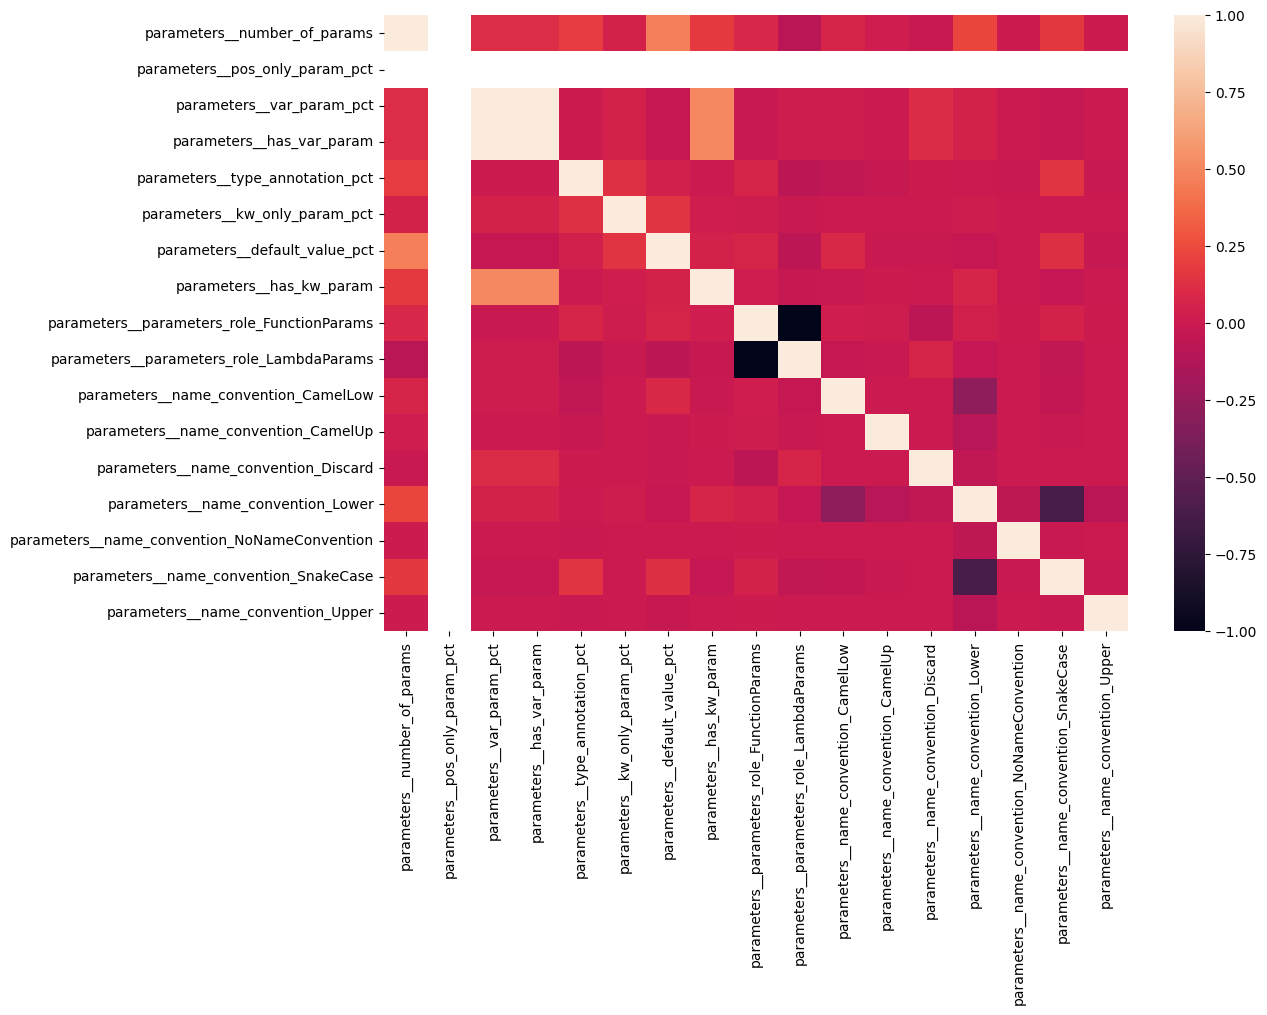

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (2 booleanas, 5 porcentuales, 1 numerica y 2 cetgoricas) se hara un analisis detallado

### Variable has_var_param (1/10)
Esta variable es de tipo booleano y representa existe al menos un parámetro del tipo vararg.

<Axes: xlabel='parameters__has_var_param', ylabel='Count'>

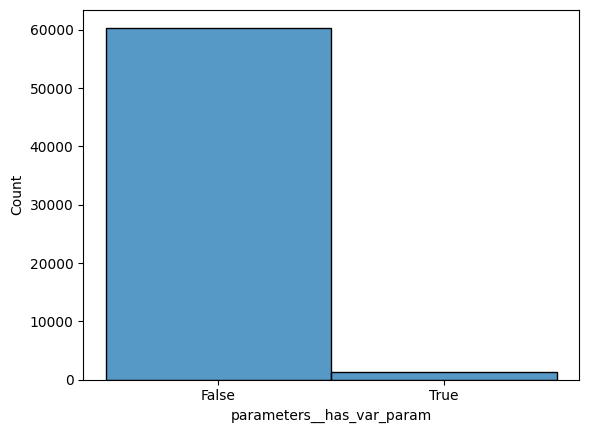

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_var_param'], discrete=True)

In [11]:
num_true_values = len(X[X['parameters__has_var_param'] == True])
num_false_values = len(X[X['parameters__has_var_param'] == False])
std = X['parameters__has_var_param'].std()
freq_true = len(X[X['parameters__has_var_param'] == True]) / len(X['parameters__has_var_param'])
freq_false = len(X[X['parameters__has_var_param'] == False]) / len(X['parameters__has_var_param'])
print(f'La variable has_var_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a False es {freq_false}.')

La variable has_var_param contiene 1349 valores verdaderos y 60403 valores falsos. Y, la desviación típica es de 0.1461799144744873
La frecuencia con la que programa puede tener la variable has_var_param a True es 0.021845446301334368.
La frecuencia con la que programa puede tener la variable has_var_param a False es 0.9781545536986657.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_var_param', possible_values)

La variable parameters__has_var_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_var_param toma el valor de 0.0 en un 97.82% de los items.
La variable parameters__has_var_param toma el valor de 1.0 en un 2.185% de los items.


In [13]:
X[X['parameters__has_var_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1349.000000,1349.0,1349.000000,1349.0,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.0,1349.000000,1349.000000,1349.0,1349.000000,1349.0
mean,2.704225,0.0,0.464548,1.0,0.100471,0.010560,0.028199,0.567087,0.959970,0.040030,0.026686,0.0,0.017791,0.924388,0.0,0.031134,0.0
std,1.284173,0.0,0.243323,0.0,0.268756,0.074234,0.107459,0.495663,0.196101,0.196101,0.161225,0.0,0.132240,0.264474,0.0,0.173745,0.0
min,1.000000,0.0,0.111111,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
50%,3.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
75%,3.000000,0.0,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
max,9.000000,0.0,1.000000,1.0,1.000000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### Variable has_kw_param (2/10)
Esta variable es de tipo booleano y representa si existe al menos un parámetro del tipo kwarg.

<Axes: xlabel='parameters__has_kw_param', ylabel='Count'>

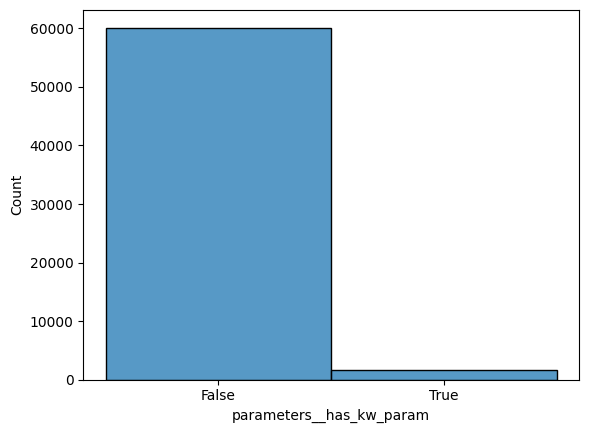

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_kw_param'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['parameters__has_kw_param'] == True])
num_false_values = len(X[X['parameters__has_kw_param'] == False])
std = X['parameters__has_kw_param'].std()
freq_true = len(X[X['parameters__has_kw_param'] == True]) / len(X['parameters__has_kw_param'])
freq_false = len(X[X['parameters__has_kw_param'] == False]) / len(X['parameters__has_kw_param'])
print(f'La variable has_kw_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a False es {freq_false}.')

La variable has_kw_param contiene 1611 valores verdaderos y 60141 valores falsos. Y, la desviación típica es de 0.15939900279045105
La frecuencia con la que programa puede tener la variable has_kw_param a True es 0.026088223863194714.
La frecuencia con la que programa puede tener la variable has_kw_param a False es 0.9739117761368052.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_kw_param', possible_values)

La variable parameters__has_kw_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_kw_param toma el valor de 0.0 en un 97.39% de los items.
La variable parameters__has_kw_param toma el valor de 1.0 en un 2.609% de los items.


In [17]:
X[X['parameters__has_kw_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1611.000000,1611.0,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.0,1611.000000,1611.000000,1611.000000,1611.000000,1611.0,1611.000000,1611.0,1611.000000,1611.0
mean,3.482309,0.0,0.165062,0.474860,0.082476,0.004549,0.105995,1.0,0.988206,0.011794,0.011173,0.003724,0.0,0.959032,0.0,0.026071,0.0
std,2.239156,0.0,0.189411,0.499523,0.251733,0.045004,0.203621,0.0,0.107991,0.107991,0.105144,0.060933,0.0,0.198278,0.0,0.159395,0.0
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
50%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
75%,4.000000,0.0,0.333333,1.000000,0.000000,0.000000,0.166667,1.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
max,21.000000,0.0,0.500000,1.000000,1.000000,0.571429,0.857143,1.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0


El 82% de los parameters con has_kw_param a True es de programas de EXPERTOS.

### Variable number_of_params (3/10)
Esta variable representa el número de parámetros que hay en el conjuto de la entidad parameters. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 21. Con una media de 1.8.

<Axes: ylabel='parameters__number_of_params'>

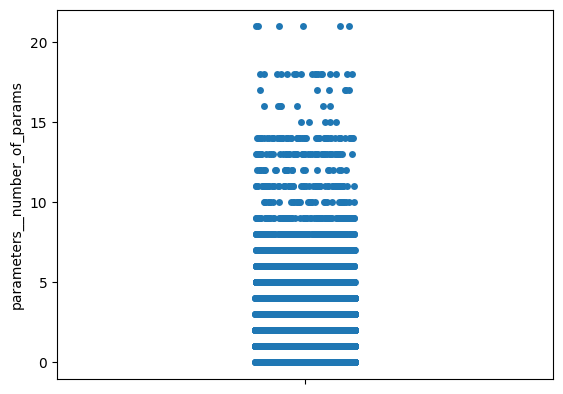

In [18]:
sns.stripplot(X['parameters__number_of_params'])

In [19]:
print_outliers_for_df_column(X, 'parameters__number_of_params')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.40836387021201
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.640775751414216,9.68231234903746]
-3.0IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -2.0 (Q1-3*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -0.5 (Q1-1.5*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
+1.5IQR: 6084 instancias tienen un valor para parameters__number_of_params superior a 3.5 (Q3+1.5*IQR) para parameters__number_of_params. Representando un 9.852% del total de instancias.
+3.0IQR: 1293 instancias tienen un valor para parameters__number_of_params superior a 5.0 (Q3-3*IQR) para parameters__number_of_params. Representando un 2.094% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9.0 (Con un MC de 40 usamos U)

In [20]:
X[X['parameters__number_of_params'] > 9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,260.000000,260.0,260.0,260.0,260.000000,260.0,260.000000,260.000000,260.0,260.0,260.0,260.0,260.0,260.000000,260.0,260.000000,260.0
mean,13.053846,0.0,0.0,0.0,0.235263,0.0,0.636321,0.138462,1.0,0.0,0.0,0.0,0.0,0.288462,0.0,0.711538,0.0
std,2.492650,0.0,0.0,0.0,0.408765,0.0,0.330241,0.346050,0.0,0.0,0.0,0.0,0.0,0.453921,0.0,0.453921,0.0
min,10.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,11.000000,0.0,0.0,0.0,0.000000,0.0,0.666667,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
50%,13.000000,0.0,0.0,0.0,0.000000,0.0,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
75%,14.000000,0.0,0.0,0.0,0.225000,0.0,0.900000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0
max,21.000000,0.0,0.0,0.0,1.000000,0.0,0.944444,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


El 83% de es de expertos.

### Variable pos_only_param_pct (4/10)
Esta variable representa la proporción de los parámetros pos_only. Toma los valores de 0.0 - 0.0.

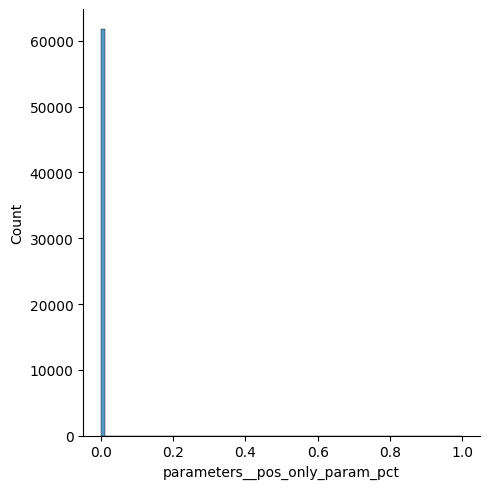

In [21]:
sns.displot(X['parameters__pos_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [22]:
print_outliers_for_df_column(X, 'parameters__pos_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para par

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [23]:
X[X['parameters__pos_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
Todos toman valor 0.0

### Variable type_annotation_pct (5/10)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo. Este campo toma valores del 0.0 - 1.0. Su media es 0.09

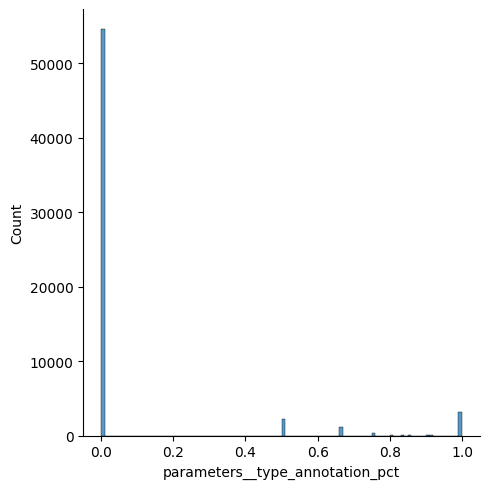

In [24]:
sns.displot(X['parameters__type_annotation_pct'], bins=[i / 100 for i in range(0, 101)])

In [25]:
print_outliers_for_df_column(X, 'parameters__type_annotation_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7804191639965934
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 7217 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3+1.5*IQR) para parameters__type_annotation_pct. Representando un 11.69% del total de instancias.
+3.0IQR: 7217 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3-3*IQR) para parameters__type_annotation_pct. Representando un 11.69% del total de instancias.
L: 0 in

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [26]:
X[X['parameters__type_annotation_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,7217.000000,7217.0,7217.000000,7217.000000,7217.000000,7217.000000,7217.000000,7217.000000,7217.0,7217.0,7217.0,7217.000000,7217.000000,7217.000000,7217.0,7217.00000,7217.0
mean,2.438686,0.0,0.011103,0.024387,0.776022,0.011275,0.101742,0.022308,1.0,0.0,0.0,0.000139,0.000693,0.795899,0.0,0.20327,0.0
std,1.531593,0.0,0.078696,0.154258,0.218561,0.089077,0.248079,0.147695,0.0,0.0,0.0,0.011771,0.026314,0.403071,0.0,0.40246,0.0
min,1.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
25%,2.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.00000,0.0
50%,2.000000,0.0,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.00000,0.0
75%,3.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.00000,0.0
max,15.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.00000,0.0


80% expertos y 20% beginners.

### Variable var_param_pct (6/10)
Esta variable representa la proporción de los parámetros que son del tipo vararg. Este campo toma valores del 0.0 - 1.0. Su media es 0.01.

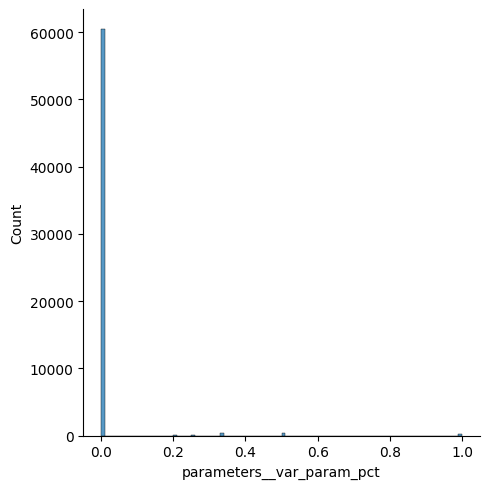

In [27]:
sns.displot(X['parameters__var_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [28]:
print_outliers_for_df_column(X, 'parameters__var_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9288880573958385
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1349 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__var_param_pct. Representando un 2.185% del total de instancias.
+3.0IQR: 1349 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3-3*IQR) para parameters__var_param_pct. Representando un 2.185% del total de instancias.
L: 0 instancias tienen un valor para parameters__var_pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [29]:
X[X['parameters__var_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,1349.000000,1349.0,1349.000000,1349.0,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.0,1349.000000,1349.000000,1349.0,1349.000000,1349.0
mean,2.704225,0.0,0.464548,1.0,0.100471,0.010560,0.028199,0.567087,0.959970,0.040030,0.026686,0.0,0.017791,0.924388,0.0,0.031134,0.0
std,1.284173,0.0,0.243323,0.0,0.268756,0.074234,0.107459,0.495663,0.196101,0.196101,0.161225,0.0,0.132240,0.264474,0.0,0.173745,0.0
min,1.000000,0.0,0.111111,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
50%,3.000000,0.0,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
75%,3.000000,0.0,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
max,9.000000,0.0,1.000000,1.0,1.000000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### Variable kw_only_param_pct (7/10)
Esta variable representa la proporción de los parámetros del tipo kw_only. Este campo toma valores del 0.0 - 1.0. Su media es 0.0015.

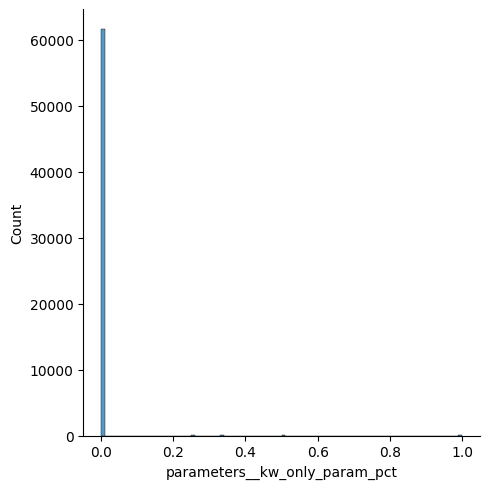

In [30]:
sns.displot(X['parameters__kw_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [31]:
print_outliers_for_df_column(X, 'parameters__kw_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9757736899858138
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 180 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.2915% del total de instancias.
+3.0IQR: 180 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__kw_only_param_pct. Representando un 0.2915% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [32]:
X[X['parameters__kw_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.0,180.0,180.0,180.0,180.000000,180.0,180.000000,180.0
mean,3.383333,0.0,0.042138,0.166667,0.813624,0.520423,0.674524,0.100000,1.0,0.0,0.0,0.0,0.0,0.911111,0.0,0.088889,0.0
std,1.631653,0.0,0.106242,0.373718,0.348866,0.298001,0.300034,0.300837,0.0,0.0,0.0,0.0,0.0,0.285377,0.0,0.285377,0.0
min,1.000000,0.0,0.000000,0.000000,0.000000,0.142857,0.250000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.000000,0.000000,0.750000,0.250000,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
50%,3.000000,0.0,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,4.000000,0.0,0.000000,0.000000,1.000000,0.800000,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


86% expertos y 14% beginners

### Variable default_value_pct (8/10)
Esta variable representa la proporción de los parámetros que tienen valor por defecto. Este campo toma valores del 0.0 - 1.0. Su media es 0.07.

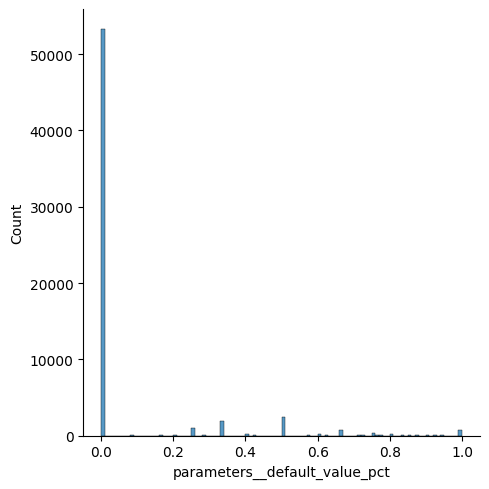

In [33]:
sns.displot(X['parameters__default_value_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'parameters__default_value_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7835257113089068
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-3*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 8499 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3+1.5*IQR) para parameters__default_value_pct. Representando un 13.76% del total de instancias.
+3.0IQR: 8499 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3-3*IQR) para parameters__default_value_pct. Representando un 13.76% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [35]:
X[X['parameters__default_value_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper
count,8499.000000,8499.0,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.0,8499.000000,8499.000000,8499.000000,8499.0
mean,3.755854,0.0,0.002856,0.012590,0.125426,0.011022,0.512630,0.047770,0.999176,0.000824,0.049418,0.000706,0.0,0.775150,0.000706,0.174020,0.0
std,2.207318,0.0,0.026970,0.111502,0.309215,0.086521,0.220857,0.213292,0.028689,0.028689,0.216751,0.026562,0.0,0.417508,0.026562,0.379149,0.0
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
50%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
75%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
max,21.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable parameters_role (9/10)
Esta variable es de tipo categorica y representa si la entidad parameters proviene de una función de una Lambda expresión.

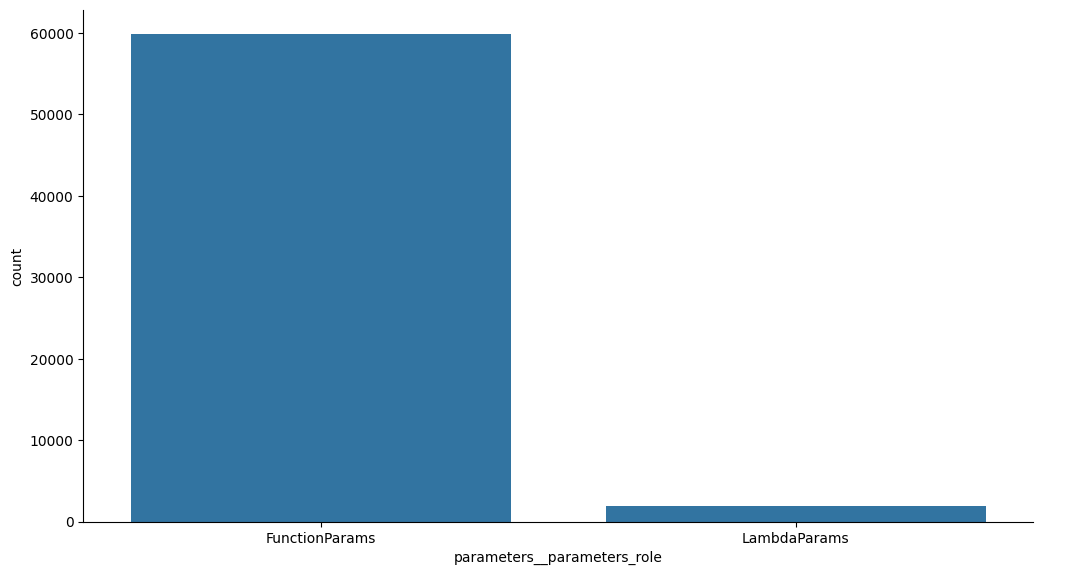

In [36]:
print_categorical_histogram(full_table, 'parameters__parameters_role')

In [37]:
print_frequency_anal_for_cat_var(full_table, 'parameters__parameters_role')

La variable parameters__parameters_role contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__parameters_role toma el valor de FunctionParams en un 96.97% de los items.
La variable parameters__parameters_role toma el valor de LambdaParams en un 3.033% de los items.


In [38]:
print_values_usage_for_cat_var(full_table, 'parameters__parameters_role', PARAMETER_ROLE_VALUES)

La variable parameters__parameters_role puede tomar 2 valores distintos
	2 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre del parámetro.

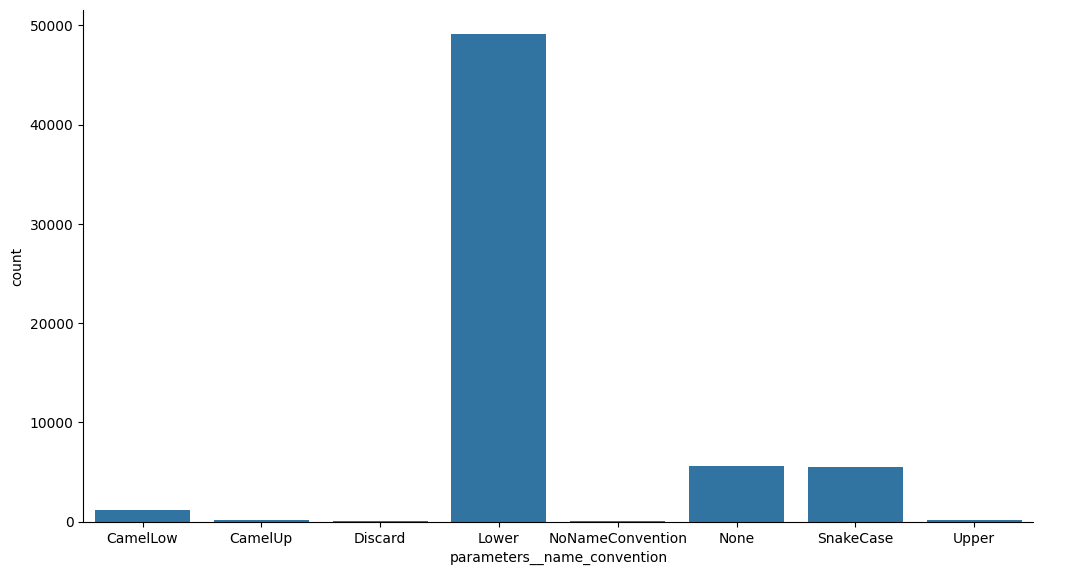

In [39]:
print_categorical_histogram(full_table, 'parameters__name_convention', fillna=True)

In [40]:
print_frequency_anal_for_cat_var(full_table, 'parameters__name_convention')

La variable parameters__name_convention contiene 8 valores distintos.
El umbral de outlier es de 0.025%
La variable parameters__name_convention toma el valor de Lower en un 79.54% de los items.
La variable parameters__name_convention toma el valor de None en un 9.026% de los items.
La variable parameters__name_convention toma el valor de SnakeCase en un 8.911% de los items.
La variable parameters__name_convention toma el valor de CamelLow en un 1.94% de los items.
La variable parameters__name_convention toma el valor de CamelUp en un 0.2478% de los items.
La variable parameters__name_convention toma el valor de Upper en un 0.1798% de los items.
La variable parameters__name_convention toma el valor de NoNameConvention en un 0.09392% de los items.
La variable parameters__name_convention toma el valor de Discard en un 0.0583% de los items.


In [41]:
print_values_usage_for_cat_var(full_table, 'parameters__name_convention', NAMING_CONVENTION_VALUES)

La variable parameters__name_convention puede tomar 7 valores distintos
	8 (114.3%) valores utilizados
	0 (0.0%) valores NO utilizados
La variable parameters__name_convention toma 1 valores desconocidos
		La variable parameters__name_convention toma valor el desconocido None.


## Multivariate

Isolation forest algorithm

In [42]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,parameters__parameters_role,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__has_kw_param,parameters__default_value_pct,parameters__name_convention,parameters__expertise_level
1860,LambdaParams,2,0.0,0.5,True,0.0,0.0,True,0.000000,SnakeCase,BEGINNER
1911,LambdaParams,1,0.0,1.0,True,0.0,0.0,False,0.000000,Discard,BEGINNER
2232,FunctionParams,21,0.0,0.0,False,0.0,0.0,True,0.857143,SnakeCase,BEGINNER
3124,LambdaParams,1,0.0,1.0,True,0.0,0.0,False,0.000000,Discard,BEGINNER
3125,LambdaParams,1,0.0,1.0,True,0.0,0.0,False,0.000000,Discard,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...
56314,LambdaParams,1,0.0,1.0,True,0.0,0.0,False,0.000000,Discard,BEGINNER
56315,LambdaParams,1,0.0,1.0,True,0.0,0.0,False,0.000000,Discard,BEGINNER
59346,LambdaParams,2,0.0,0.5,True,0.0,0.0,True,0.000000,Lower,BEGINNER
59825,FunctionParams,18,0.0,0.0,False,0.0,0.0,True,0.777778,SnakeCase,BEGINNER


### IMPORTANTE
Revisar los outliers detectados.

In [43]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,63.0,5.841270,6.933338,1.0,1.000000,2.0,7.000000,21.000000
parameters__pos_only_param_pct,63.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
parameters__var_param_pct,63.0,0.475624,0.378086,0.0,0.142857,0.5,1.000000,1.000000
parameters__has_var_param,63.0,0.809524,0.395831,0.0,1.000000,1.0,1.000000,1.000000
parameters__type_annotation_pct,63.0,0.191043,0.345165,0.0,0.000000,0.0,0.000000,0.857143
parameters__kw_only_param_pct,63.0,0.096939,0.186354,0.0,0.000000,0.0,0.000000,0.571429
parameters__default_value_pct,63.0,0.252645,0.330241,0.0,0.000000,0.0,0.571429,0.857143
parameters__has_kw_param,63.0,0.714286,0.455383,0.0,0.000000,1.0,1.000000,1.000000
parameters__parameters_role_FunctionParams,63.0,0.428571,0.498847,0.0,0.000000,0.0,1.000000,1.000000
parameters__parameters_role_LambdaParams,63.0,0.571429,0.498847,0.0,0.000000,1.0,1.000000,1.000000


In [44]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
parameters__number_of_params,61689.0,1.844640,1.468938,0.0,1.0,2.0,2.0,18.0
parameters__pos_only_param_pct,61689.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
parameters__var_param_pct,61689.0,0.009673,0.074463,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,61689.0,0.021041,0.143522,0.0,0.0,0.0,0.0,1.0
parameters__type_annotation_pct,61689.0,0.090592,0.260149,0.0,0.0,0.0,0.0,1.0
parameters__kw_only_param_pct,61689.0,0.001420,0.031646,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,61689.0,0.070368,0.194418,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,61689.0,0.025385,0.157294,0.0,0.0,0.0,0.0,1.0
parameters__parameters_role_FunctionParams,61689.0,0.970222,0.169977,0.0,1.0,1.0,1.0,1.0
parameters__parameters_role_LambdaParams,61689.0,0.029778,0.169977,0.0,0.0,0.0,0.0,1.0
